## London Housing Price - Case Study

## Question:  which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

## 1. Sourcing and Loading

### 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1.2 Download data

In [2]:
# First, make a variable called url_LondonHousePrices
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

## 2. Cleaning, Transforming, and Visualizing

### 2.1 Exploring Data

In [3]:
print(properties.head())

  Unnamed: 0 City of London Barking & Dagenham       Barnet       Bexley  \
0        NaT      E09000001          E09000002    E09000003    E09000004   
1 1995-01-01    91448.98487         50460.2266  93284.51832  64958.09036   
2 1995-02-01    82202.77314        51085.77983  93190.16963  64787.92069   
3 1995-03-01    79120.70256        51268.96956  92247.52435  64367.49344   
4 1995-04-01    77101.20804        53133.50526  90762.87492  64277.66881   

         Brent      Bromley       Camden      Croydon       Ealing  ...  \
0    E09000005    E09000006    E09000007    E09000008    E09000009  ...   
1  71306.56698  81671.47692  120932.8881  69158.16225  79885.89069  ...   
2  72022.26197  81657.55944  119508.8622  68951.09542  80897.06551  ...   
3  72015.76274  81449.31143  120282.2131  68712.44341  81379.86288  ...   
4  72965.63094  81124.41227   120097.899  68610.04641  82188.90498  ...   

    NORTH WEST YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND  \
0    E12000

In [4]:
print(properties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            319 non-null    datetime64[ns]
 1   City of London        320 non-null    object        
 2   Barking & Dagenham    320 non-null    object        
 3   Barnet                320 non-null    object        
 4   Bexley                320 non-null    object        
 5   Brent                 320 non-null    object        
 6   Bromley               320 non-null    object        
 7   Camden                320 non-null    object        
 8   Croydon               320 non-null    object        
 9   Ealing                320 non-null    object        
 10  Enfield               320 non-null    object        
 11  Greenwich             320 non-null    object        
 12  Hackney               320 non-null    object        
 13  Hammersmith & Fulham

In [6]:
print(properties.shape)

(320, 49)


#### Summary: 
#### 320 x 49 DataFrame
#### the first column contains the date (the first date of the month), each subsequent column is data for a given borough 
#### the first row is the borough ID and each subsequent row is the borough housing price for that given date
#### 320 rows but onlmy 319 are data because the first row is the ID
#### 3 null columns 

### 2.2 Cleaning Data

In [39]:
properties_clean = properties.copy() # to preserve the original dataframe
col_names = properties_clean.pop('Unnamed: 0').copy() # remove the 1st column from the DF and save a copy
col_names.iloc[0] = 'id' # change the first element to 'id'

# transpose the dataframe so that each observations are rows and features are columns
# the borough names are new indices 
properties_clean = properties_clean.transpose()
properties_clean = properties_clean.dropna(axis = 0, how = 'any')   # drop rows with all NAN values 
                                            # important to check the size after this step because it wont raise an error 

# after removing 3 null rows, the DF size is now 45x320 
# change the columns to borough names 
properties_clean.set_axis(col_names, axis = 1, inplace= True) # set inplace = True to save changes to the DF


In [40]:
print(properties_clean.head())
print(properties_clean.shape)

Unnamed: 0                 id 1995-01-01 00:00:00 1995-02-01 00:00:00  \
City of London      E09000001         91448.98487         82202.77314   
Barking & Dagenham  E09000002          50460.2266         51085.77983   
Barnet              E09000003         93284.51832         93190.16963   
Bexley              E09000004         64958.09036         64787.92069   
Brent               E09000005         71306.56698         72022.26197   

Unnamed: 0         1995-03-01 00:00:00 1995-04-01 00:00:00  \
City of London             79120.70256         77101.20804   
Barking & Dagenham         51268.96956         53133.50526   
Barnet                     92247.52435         90762.87492   
Bexley                     64367.49344         64277.66881   
Brent                      72015.76274         72965.63094   

Unnamed: 0         1995-05-01 00:00:00 1995-06-01 00:00:00  \
City of London             84409.14932         94900.51244   
Barking & Dagenham         53042.24852         53700.34831   
Ba

In [24]:
print(properties_clean.index)

Index(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Inner London', 'Outer London', 'NORTH EAST', 'NORTH WEST',
       'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS',
       'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England'],
      dtype='object')


In [41]:
print(properties_clean.shape)

(45, 320)


### 2.3 Transforming data

In [42]:
# there are only 32 London boroughs, but our DF has 45 rows
# first, check if there was any duplicates
properties_clean.duplicated() # there was no duplicate, so there must be some non-London boroughs in this list

City of London          False
Barking & Dagenham      False
Barnet                  False
Bexley                  False
Brent                   False
Bromley                 False
Camden                  False
Croydon                 False
Ealing                  False
Enfield                 False
Greenwich               False
Hackney                 False
Hammersmith & Fulham    False
Haringey                False
Harrow                  False
Havering                False
Hillingdon              False
Hounslow                False
Islington               False
Kensington & Chelsea    False
Kingston upon Thames    False
Lambeth                 False
Lewisham                False
Merton                  False
Newham                  False
Redbridge               False
Richmond upon Thames    False
Southwark               False
Sutton                  False
Tower Hamlets           False
Waltham Forest          False
Wandsworth              False
Westminster             False
Inner Lond

In [32]:
# there was no row duplicates, the list of london boroughs from Wikipedia only has 32 boroughs
# note that city of london is not a london borough
london_boroughs = {1: 'Barking & Dagenham', 2: 'Barnet', 3: 'Bexley', 4: 'Brent', 5: 'Bromley', 
                   6: 'Camden', 7: 'Croydon', 8: 'Ealing', 9: 'Enfield', 10: 'Greenwich', 
                   11: 'Hackney', 12: 'Hammersmith & Fulham', 13: 'Haringey', 14: 'Harrow', 15: 'Havering', 
                   16: 'Hillingdon', 17: 'Hounslow', 18: 'Islington', 19: 'Kensington & Chelsea', 20: 'Kingston upon Thames', 
                   21: 'Lambeth', 22: 'Lewisham', 23: 'Merton', 24: 'Newham', 25: 'Redbridge', 
                   26: 'Richmond upon Thames', 27: 'Southwark', 28: 'Sutton', 29: 'Tower Hamlets',30: 'Waltham Forest',
                   31: 'Wandsworth', 32: 'Westminster'} 

In [44]:
# subset london boroughs only
properties_London_boroughs = properties_clean.loc[london_boroughs.values()] # 32 by 320 DF

# add a column for borough names
properties_London_boroughs['boroughs'] = london_boroughs.values()
print(properties_London_boroughs.head())

Unnamed: 0                 id 1995-01-01 00:00:00 1995-02-01 00:00:00  \
Barking & Dagenham  E09000002          50460.2266         51085.77983   
Barnet              E09000003         93284.51832         93190.16963   
Bexley              E09000004         64958.09036         64787.92069   
Brent               E09000005         71306.56698         72022.26197   
Bromley             E09000006         81671.47692         81657.55944   

Unnamed: 0         1995-03-01 00:00:00 1995-04-01 00:00:00  \
Barking & Dagenham         51268.96956         53133.50526   
Barnet                     92247.52435         90762.87492   
Bexley                     64367.49344         64277.66881   
Brent                      72015.76274         72965.63094   
Bromley                    81449.31143         81124.41227   

Unnamed: 0         1995-05-01 00:00:00 1995-06-01 00:00:00  \
Barking & Dagenham         53042.24852         53700.34831   
Barnet                     90258.00033         90107.23471   
Be

In [45]:
# tranform the DF from wide to long format
# group by boroughs and id columns 
properties_long = properties_London_boroughs.melt( id_vars = ['boroughs','id'], var_name = 'date', value_name = 'price')

# check the type of 'price' column
print(type(properties_long['price']))

<class 'pandas.core.series.Series'>


In [46]:
# convert price column to float to perform future calculations 
properties_long['price'] = properties_long['price'].astype('float')

# extract day, month, and year from TimeStamp objects in pandas
properties_long['year'] = [pd.to_datetime(s).year for s in properties_long['date']]
properties_long['month'] = [pd.to_datetime(s).month for s in properties_long['date']]
properties_long['day'] = [pd.to_datetime(s).day for s in properties_long['date']]

In [47]:
# get some summary statistics 
print(properties_long.pivot_table(values = 'price', index = ['boroughs', 'year'], 
                                  aggfunc= [np.mean, np.min, np.max, np.median]))


                                 mean          amin          amax  \
                                price         price         price   
boroughs           year                                             
Barking & Dagenham 1995  5.181797e+04  5.046023e+04  5.370035e+04   
                   1996  5.171819e+04  5.062111e+04  5.385351e+04   
                   1997  5.597426e+04  5.445903e+04  5.802496e+04   
                   1998  6.028582e+04  5.736030e+04  6.348754e+04   
                   1999  6.532093e+04  6.352809e+04  6.881221e+04   
...                               ...           ...           ...   
Westminster        2017  1.064772e+06  1.034779e+06  1.109054e+06   
                   2018  1.020025e+06  9.650226e+05  1.117408e+06   
                   2019  9.559986e+05  9.059511e+05  1.021533e+06   
                   2020  9.604692e+05  9.027686e+05  1.026785e+06   
                   2021  9.230070e+05  8.713894e+05  9.532458e+05   

                               me

In [38]:
#make sure that there was no missing values 
properties_long.isna().any()

boroughs    False
id          False
date        False
price       False
year        False
month       False
day         False
dtype: bool

In [50]:
# this is our cleaned and transformed dataset 
properties_clean = properties_long

### 2.4 Visualizing Data

#### 2.4.1 Average housing prices vs. months for a given borough

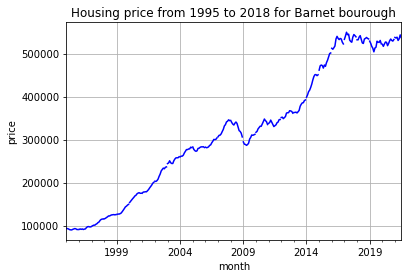

In [94]:
# let's look at Barnet borough
Barnet = properties_clean[properties_clean['boroughs'] == 'Barnet']
fig, ax = plt.subplots()
Barnet.groupby('year')[['price', 'date']].plot(ax = ax, x = 'date', y = 'price', c = 'blue')
ax.get_legend().set_visible(False)
plt.title('Housing price from 1995 to 2018 for Barnet bourough')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()
plt.show()

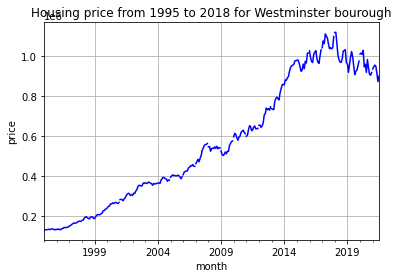

In [95]:
# let's try Westminster
Westminster = properties_clean[properties_clean['boroughs'] == 'Westminster']
fig, ax = plt.subplots()
Westminster.groupby('year')[['price', 'date']].plot(ax = ax, x = 'date', y = 'price', c = 'blue')
ax.get_legend().set_visible(False)
plt.title('Housing price from 1995 to 2018 for Westminster bourough')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()
plt.show()

#### 2.4.2 Average price per year over time for a given borough

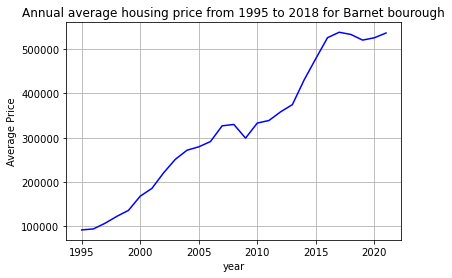

In [107]:
# to smooth out this trend, let's look at the average price per year over time for a given borough
Barnet.groupby('year')['price'].mean().plot(c = 'blue')
plt.title('Annual average housing price from 1995 to 2018 for Barnet bourough')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.grid()
plt.show()

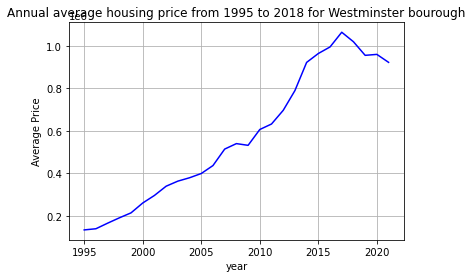

In [108]:
# Let's look at Westminster borough again
Westminster.groupby('year')['price'].mean().plot(c = 'blue')
plt.title('Annual average housing price from 1995 to 2018 for Westminster bourough')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.grid()
plt.show()

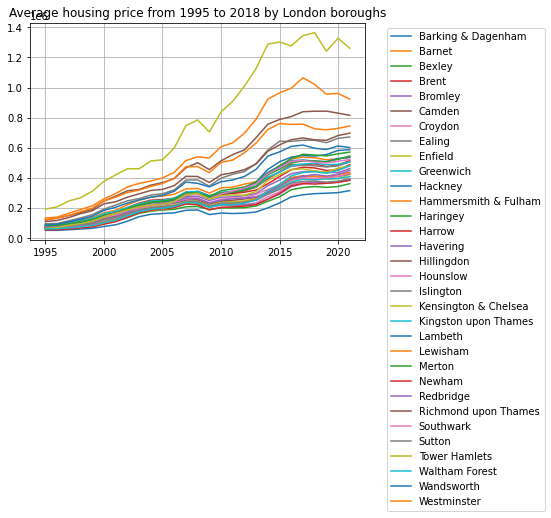

In [121]:
# create a avg_price vs. year plot for each boroughs 
fig, ax = plt.subplots()
price_trend = {}
for key1, row in properties_clean.groupby(['boroughs']):
    year = []
    avg_price = []
    for key2, row2 in row.groupby('year')['price']:
        year.append(key2)
        avg_price.append(row2.mean())
    ax.plot(year, avg_price, label = key1)
    price_trend[key1] = avg_price
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Average housing price from 1995 to 2018 by London boroughs')
plt.grid()
plt.savefig('Average_housing_price_from_1995_to_2018.png', 
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor = 'w',
            edgecolor ='w',
            orientation ='landscape')
plt.show()


In [122]:
print(price_trend)

{'Barking & Dagenham': [51817.969390000006, 51718.19269, 55974.262309166654, 60285.821083333336, 65320.934440833335, 77549.51329, 88664.05822333333, 112221.91248166667, 142498.92779999998, 158175.98248333333, 163360.7820166667, 167853.34255833333, 184909.80738333333, 187356.8657833333, 156446.89635833332, 166560.705275, 163465.14422499997, 165863.91160000002, 173733.62493333334, 201172.22941666667, 233460.10742499997, 273919.6360416666, 287734.71735833335, 295196.67361166666, 298337.9134083334, 302143.05725833325, 315469.1831285714], 'Barnet': [91792.5374325, 94000.44544833334, 106883.18554583336, 122359.46803333331, 136004.51206666665, 167952.63395833338, 185563.35259999998, 220746.059225, 251212.9276833333, 271854.11299166665, 279459.6696833333, 291337.7962083334, 326915.49851666664, 330023.3133916667, 299103.01481666666, 333128.09670000005, 338978.01252499997, 358627.34624999994, 374770.610075, 430363.35122500005, 478687.94987499993, 525939.5773, 538281.0170083334, 533266.534055, 52

In [123]:
# find the boroughs with highest absolute price increase 
price_ranking = (pd.DataFrame(price_trend)).transpose()
price_ranking.set_axis(properties_clean['year'].unique(), axis = 1, inplace= True)
price_ranking['18_98_price_diff'] = price_ranking[2018] - price_ranking[1998]


In [124]:
print(price_ranking.sort_values('18_98_price_diff', ascending = False).iloc[:,[3, -2, -1]])

                               1998          2021  18_98_price_diff
Kensington & Chelsea  268350.122142  1.260723e+06      1.095530e+06
Westminster           190531.949942  9.230070e+05      8.294933e+05
Camden                170688.973933  8.152548e+05      6.717214e+05
Hammersmith & Fulham  175340.921250  7.445710e+05      5.501844e+05
Islington             134148.973300  6.715330e+05      5.156751e+05
Richmond upon Thames  162956.066025  6.972436e+05      4.897094e+05
Wandsworth            125406.807233  6.015779e+05      4.712423e+05
Hackney                87869.535804  5.870977e+05      4.567709e+05
Haringey              107419.850108  5.712339e+05      4.441408e+05
Southwark              91405.187779  5.219052e+05      4.128302e+05
Barnet                122359.468033  5.365407e+05      4.109071e+05
Lambeth               103179.118943  5.360652e+05      4.083573e+05
Merton                108049.855117  5.456511e+05      4.042440e+05
Brent                 100692.590417  5.145031e+0

## 3. Modeling

### 3.1 Borough ranking by 2018/1988 price ratio

In [128]:
# Calculate the price ratio between 2018 and 1998 for each borough and rank the boroughs by this ratio 
price_ranking['18_98_price_ratio'] = price_ranking[2018]/price_ranking[1998]
print(price_ranking.sort_values('18_98_price_ratio', ascending = False).iloc[:,[3,-6, -2, -1]])

                               1998          2018  18_98_price_diff  \
Hackney                87869.535804  5.446405e+05      4.567709e+05   
Waltham Forest         75557.474132  4.408594e+05      3.653019e+05   
Southwark              91405.187779  5.042354e+05      4.128302e+05   
Lewisham               75539.051649  4.116290e+05      3.360899e+05   
Westminster           190531.949942  1.020025e+06      8.294933e+05   
Newham                 67671.270763  3.590225e+05      2.913512e+05   
Haringey              107419.850108  5.515606e+05      4.441408e+05   
Kensington & Chelsea  268350.122142  1.363880e+06      1.095530e+06   
Lambeth               103179.118943  5.115364e+05      4.083573e+05   
Camden                170688.973933  8.424104e+05      6.717214e+05   
Barking & Dagenham     60285.821083  2.951967e+05      2.349109e+05   
Brent                 100692.590417  4.928454e+05      3.921528e+05   
Islington             134148.973300  6.498241e+05      5.156751e+05   
Greenw

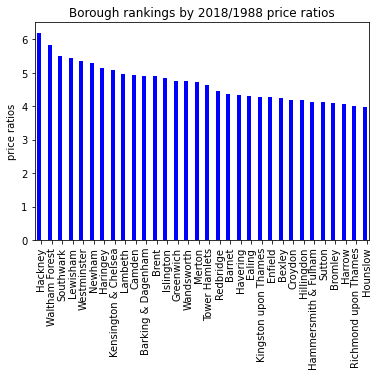

In [153]:
# plot the results for the boroughs with the highest price ratios 
plotData = price_ranking.sort_values('18_98_price_ratio', ascending = False).iloc[:,[-2, -1]]

fig = plt.figure() 
plotData['18_98_price_ratio'].plot(kind='bar', color='blue', width = .4, position=1)
plt.title('Borough rankings by 2018/1988 price ratios')
plt.ylabel('price ratios')
plt.show()

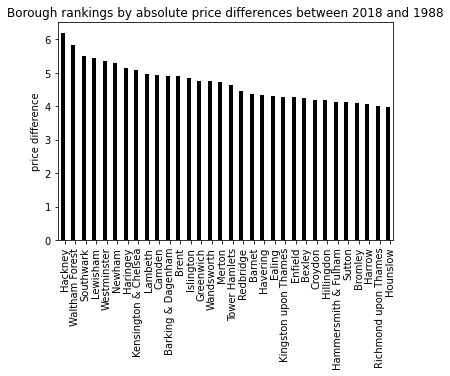

In [152]:
# plot the results for the boroughs with the highest price differences 
fig = plt.figure() 
price_ranking.sort_values('18_98_price_ratio', ascending = False)['18_98_price_ratio'].plot(kind='bar', color = 'black', width = .4, position=1)
plt.title('Borough rankings by absolute price differences between 2018 and 1988')
plt.ylabel('price difference')
plt.show()

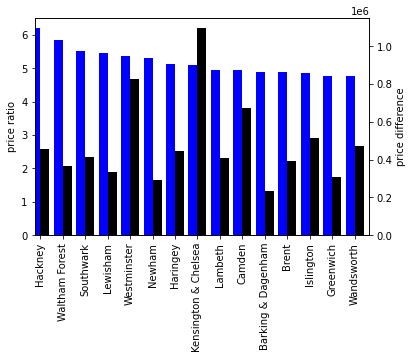

In [155]:
# Combine the 2 previous plot for the 15 boroughs with the biggest price ratios
plotData = price_ranking.sort_values('18_98_price_ratio', ascending = False).iloc[:15,[-2, -1]]
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

plotData['18_98_price_ratio'].plot(kind='bar', color='blue', ax=ax, width = .4, position=1)
plotData['18_98_price_diff'].plot(kind='bar', color='black', ax=ax2, width = .4, position=0)

ax.set_ylabel('price ratio')
ax2.set_ylabel('price difference')

plt.show()

### 3.2 Alternative visualizations

In [140]:
print(plotData)

                      18_98_price_diff  18_98_price_ratio
Hackney                   4.567709e+05           6.198286
Waltham Forest            3.653019e+05           5.834756
Southwark                 4.128302e+05           5.516485
Lewisham                  3.360899e+05           5.449221
Westminster               8.294933e+05           5.353565
Newham                    2.913512e+05           5.305390
Haringey                  4.441408e+05           5.134625
Kensington & Chelsea      1.095530e+06           5.082465
Lambeth                   4.083573e+05           4.957751
Camden                    6.717214e+05           4.935353
Barking & Dagenham        2.349109e+05           4.896619
Brent                     3.921528e+05           4.894554
Islington                 5.156751e+05           4.844048
Greenwich                 3.068114e+05           4.763036
Wandsworth                4.712423e+05           4.757709
Merton                    4.042440e+05           4.741273
Tower Hamlets 

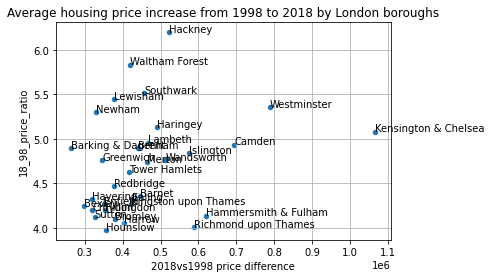

In [22]:
price_trend.plot(kind = "scatter", y = '18_98_price_ratio', x = 'price_diff')
# add annotations
for label, corrs in price_trend.iterrows():
    plt.annotate(label, (corrs['price_diff'], corrs['18_98_price_ratio']))
plt.title('Average housing price increase from 1998 to 2018 by London boroughs')
plt.xlabel('2018vs1998 price difference')
plt.grid()
plt.savefig('Average_price_increase_from_1998_to_2018.png', 
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor = 'w',
            edgecolor ='w',
            orientation ='landscape')
plt.show()

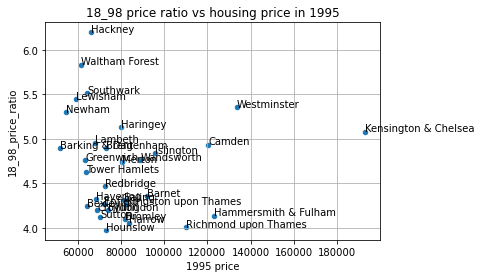

In [23]:
price_trend.plot(kind = "scatter", y = '18_98_price_ratio', x = 1995)
# add annotations
for label, corrs in price_trend.iterrows():
    plt.annotate(label, (corrs[1995], corrs['18_98_price_ratio']))
plt.xlabel('1995 price')
plt.title('18_98 price ratio vs housing price in 1995')
plt.grid()
plt.savefig('Price_ratio_vs_price_1995.png', 
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor = 'w',
            edgecolor ='w',
            orientation ='landscape')
plt.show()

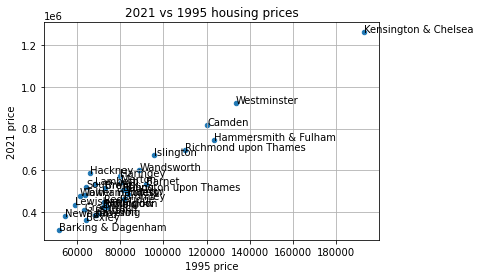

In [24]:
price_trend.plot(kind = "scatter", y = 2021, x = 1995)
# add annotations
for label, corrs in price_trend.iterrows():
    plt.annotate(label, (corrs[1995], corrs[2021]))
plt.xlabel('1995 price')
plt.ylabel('2021 price')
plt.title('2021 vs 1995 housing prices')
plt.grid()
plt.savefig('2021_vs_1995_housing_prices.png', 
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor = 'w',
            edgecolor ='w',
            orientation ='landscape')
plt.show()

## Conclusions

From 1995 to 2021, we saw an average price increase of 456,872 GBP across 32 London boroughs with a highest
absolute increase happened in Kensington & Chelsea of almost 1 million and a the smallest absolute increase happened in Barking & Dagenham around 263k. 

However, when looking at the price ratio between 2018 and 1998, the fastest increase happened in Hackey where housing value increased almost 6 times in 2 decades and the slowest growth was in Houslow of slightly below 4 times. If we segment the data by their values in 1995, the least expensive boroughs - such as Hackney, Waltham Forest, Southwark, underwent the fastest growth in percentage points. However, some equally less expensive boroughs in 1995 such as Houslow, Sutton,  Harrow experienced a much slower growth in 2 decades. The interesting thing is that the growth trends varied so much in the last 2 decades among boroughs with similar values in 1995. 

It is important to remember that changes in housing price is strongly correlated with infrastructure, socialeconomic, education, and commercial developments happening in the corresponding boroughs in the last 2 decades. Many of the least expensive neighborhoods have become a lot more desirable while demands in the expensive boroughs seemed to slow down. 
